In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import math
import time
# 한글폰트 적용
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc("font",family="AppleGothic")
import seaborn as sns
from datetime import datetime as dt

#마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [2]:
competitor = pd.read_csv('./DATA/경쟁사이용.txt', encoding='euc-kr', sep=',')
demo = pd.read_csv('./DATA/고객DEMO.txt', encoding='euc-kr', sep=',')
membership = pd.read_csv('./DATA/멤버십여부.txt', encoding='euc-kr', sep=',')
procl = pd.read_csv('./DATA/상품분류.txt', encoding='euc-kr', sep=',')
channel = pd.read_csv('./DATA/채널이용.txt', encoding='euc-kr', sep=',')
purprd = pd.read_csv('./DATA/구매상품TR.txt', encoding='euc-kr', sep=',')

In [103]:
new[:2]

,고객번호,성별,연령대,거주지역,영수증번호,소분류코드,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명,구매일자(datetime),연도,연월
0,1,M,60세이상,60.0,7088136,B430101,13,20150128,21,5960,B,43,4301,어묵맛살,어묵,2015-01-28 00:00:00+00:00,2015,201501
1,1,M,60세이상,60.0,7079913,B120603,13,20141218,10,27880,B,12,1206,통조림,축산물통조림,2014-12-18 00:00:00+00:00,2014,201412


In [104]:
visual = new[['고객번호','구매금액','성별','거주지역','연령대','제휴사','연도']]
visual.head()

,고객번호,구매금액,성별,거주지역,연령대,제휴사,연도
0,1,5960,M,60.0,60세이상,B,2015
1,1,27880,M,60.0,60세이상,B,2014
2,1,8900,M,60.0,60세이상,B,2014
3,1,2980,M,60.0,60세이상,B,2014
4,1,3700,M,60.0,60세이상,B,2014


In [113]:
year1 = visual[['고객번호','구매금액']]

year2 = year1.groupby('고객번호').count()
year2.reset_index(inplace=True)
year2.rename(columns={'구매금액':'구매건수'}, inplace=True)
year2

,고객번호,구매건수
0,1,1057
1,2,1116
2,3,1191
3,4,930
4,5,719
...,...,...
19378,19379,584
19379,19380,440
19380,19381,805
19381,19382,906


In [65]:
# 제휴사별 구매 금액
ppur = purprd.copy()
compe = pur.groupby(['제휴사']).count()

compe = compe.drop(['영수증번호','대분류코드','중분류코드','소분류코드','고객번호','점포코드','구매일자','구매시간'],axis=1)
compe = compe.reset_index()
compe[:5]

,제휴사,구매금액
0,A,5770318
1,B,13338074
2,C,9379236
3,D,105402


In [42]:
compe.size()

제휴사
A     5770318
B    13338074
C     9379236
D      105402
Name: 구매금액, dtype: int64

<AxesSubplot: xlabel='제휴사', ylabel='구매금액'>

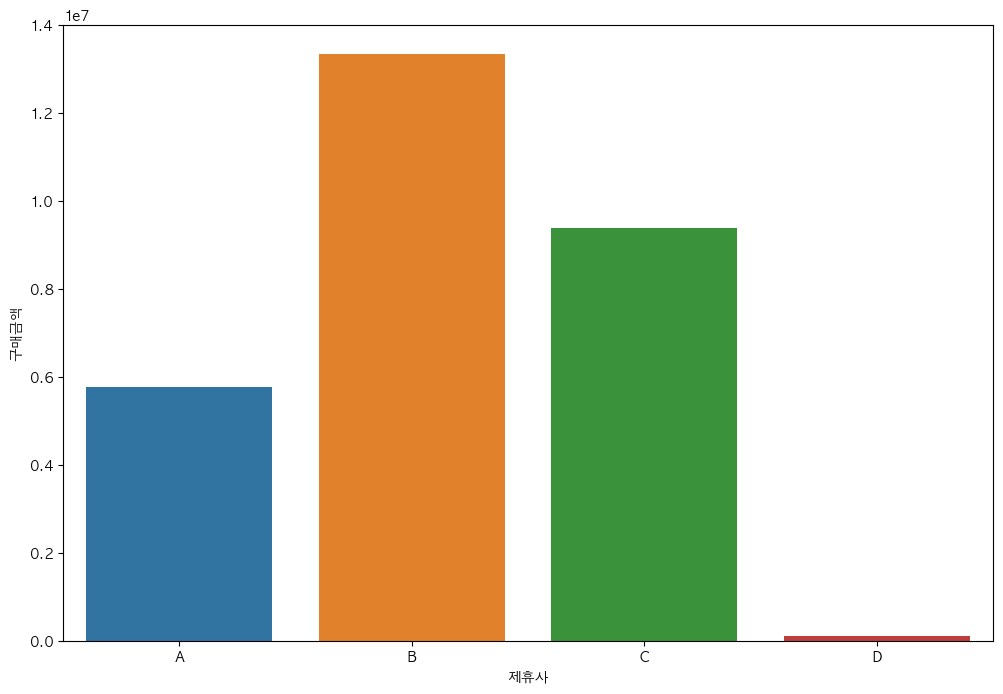

In [68]:
plt.figure(figsize=(12,8))
sns.barplot(x='제휴사', y='구매금액',data=compe)

In [3]:
purchase = purprd.copy()
purchase= purchase.drop(['중분류코드','제휴사', '대분류코드'] , axis=1)
eda = pd.merge(purchase, procl, on='소분류코드', how='inner')

# demo + eda
new = pd.merge(demo, eda, on='고객번호', how='left')

In [90]:
new[:3]

,고객번호,성별,연령대,거주지역,영수증번호,소분류코드,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명,구매일자(datetime),연도,연월
0,1,M,60세이상,60.0,7088136,B430101,13,20150128,21,5960,B,43,4301,어묵맛살,어묵,2015-01-28 00:00:00+00:00,2015,201501
1,1,M,60세이상,60.0,7079913,B120603,13,20141218,10,27880,B,12,1206,통조림,축산물통조림,2014-12-18 00:00:00+00:00,2014,201412
2,1,M,60세이상,60.0,7079913,B170103,13,20141218,10,8900,B,17,1701,세탁세제,액체세제,2014-12-18 00:00:00+00:00,2014,201412


In [4]:
from datetime import datetime
new['구매일자(datetime)'] = pd.to_datetime(new['구매일자'])
new['구매일자(datetime)'] = new['구매일자(datetime)'].dt.tz_localize('UTC')
new['구매일자'] = new['구매일자'].astype(str)
new['연도'] = new['구매일자(datetime)'].dt.strftime("%Y")
new['연월'] = new['구매일자(datetime)'].dt.strftime("%Y%m")

KeyboardInterrupt: 

In [91]:
year14 = new.loc[new['연도']=='2014']
year15 = new.loc[new['연도']=='2015']

In [95]:
year14.columns

Index(['고객번호', '성별', '연령대', '거주지역', '영수증번호', '소분류코드', '점포코드', '구매일자', '구매시간',
       '구매금액', '제휴사', '대분류코드', '중분류코드', '중분류명', '소분류명', '구매일자(datetime)', '연도',
       '연월'],
      dtype='object')

In [96]:
year1414 = year14.groupby(['연도']).count()

year1414 = year1414.drop(['고객번호', '성별', '연령대', '거주지역', '영수증번호', '소분류코드', '점포코드', '구매일자', '구매시간',
       '제휴사', '대분류코드', '중분류코드', '중분류명', '소분류명', '구매일자(datetime)','연월'],axis=1)
year1414 = year1414.reset_index()
year1414[:5]

,연도,구매금액
0,2014,13871514


In [97]:
year1515 = year15.groupby(['연도']).count()

year1515 = year1515.drop(['고객번호', '성별', '연령대', '거주지역', '영수증번호', '소분류코드', '점포코드', '구매일자', '구매시간',
       '제휴사', '대분류코드', '중분류코드', '중분류명', '소분류명', '구매일자(datetime)','연월'],axis=1)
year1515 = year1515.reset_index()
year1515[:5]

,연도,구매금액
0,2015,14721516


In [98]:
year = pd.concat([year1414, year1515])

In [99]:
year

,연도,구매금액
0,2014,13871514
0,2015,14721516


<AxesSubplot: xlabel='연도', ylabel='구매금액'>

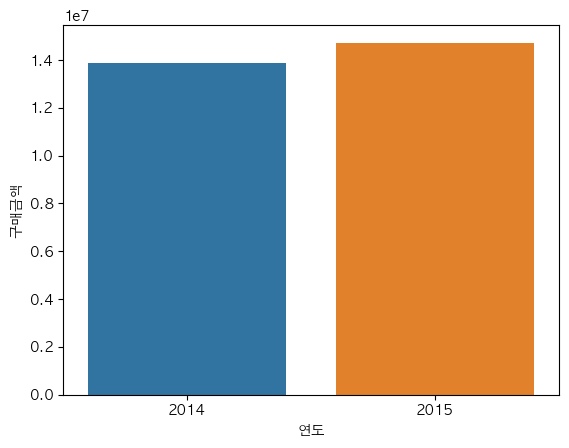

In [100]:
sns.barplot(x='연도', y='구매금액', data=year)

In [101]:
new[:3]

,고객번호,성별,연령대,거주지역,영수증번호,소분류코드,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명,구매일자(datetime),연도,연월
0,1,M,60세이상,60.0,7088136,B430101,13,20150128,21,5960,B,43,4301,어묵맛살,어묵,2015-01-28 00:00:00+00:00,2015,201501
1,1,M,60세이상,60.0,7079913,B120603,13,20141218,10,27880,B,12,1206,통조림,축산물통조림,2014-12-18 00:00:00+00:00,2014,201412
2,1,M,60세이상,60.0,7079913,B170103,13,20141218,10,8900,B,17,1701,세탁세제,액체세제,2014-12-18 00:00:00+00:00,2014,201412


In [ ]:
gender = a

In [81]:
purprd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28593030 entries, 0 to 28593029
Data columns (total 10 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   제휴사     object
 1   영수증번호   int64 
 2   대분류코드   int64 
 3   중분류코드   int64 
 4   소분류코드   object
 5   고객번호    int64 
 6   점포코드    int64 
 7   구매일자    int64 
 8   구매시간    int64 
 9   구매금액    int64 
dtypes: int64(8), object(2)
memory usage: 2.1+ GB


In [5]:
purprd.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120


In [41]:
pur1 = purprd.copy()
compe = pur1['구매금액'].groupby(pur1['제휴사'])

In [52]:
pur = purprd.copy()
compe = pur.groupby(['제휴사']).count()

In [54]:
compe = compe.drop(['영수증번호','대분류코드','중분류코드','소분류코드','고객번호','점포코드','구매일자','구매시간'],axis=1)

In [55]:
compe

,구매금액
제휴사,
A,5770318
B,13338074
C,9379236
D,105402


In [63]:
compe = compe.reset_index()

In [ ]:
sns.barplot(x = '제휴사', y = '총매출액',hue = '성별', style = 'year',data = df3)

In [69]:
demo[:5]

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,60.0
1,2,M,60세이상,100.0
2,3,M,60세이상,33.0
3,4,F,60세이상,16.0
4,5,M,60세이상,100.0


In [75]:
dem = demo.groupby(['성별']).count()
dem = dem.reset_index()
dem.drop(['연령대','거주지역','고객번호'],axis=1)

,성별
0,F
1,M


In [78]:
dem_pur = pd.concat([demo, purprd],axis=1)
dem_pur

,고객번호,성별,연령대,거주지역,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,1.0,M,60세이상,60.0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,2.0,M,60세이상,100.0,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,3.0,M,60세이상,33.0,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,4.0,F,60세이상,16.0,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,5.0,M,60세이상,100.0,B,8664001,5,509,B050901,17674,44,20140222,22,1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,NaN,NaN,NaN,NaN,B,8116737,37,3709,B370904,7439,29,20150525,19,14000
28593026,NaN,NaN,NaN,NaN,B,8116738,37,3709,B370904,16421,29,20150525,20,6500
28593027,NaN,NaN,NaN,NaN,B,8116739,8,802,B080203,8266,29,20150525,13,16000
28593028,NaN,NaN,NaN,NaN,B,8116764,90,9001,B900103,14316,29,20150526,19,1000


In [71]:
dem = dem.reset_index()

,고객번호,연령대,거주지역
성별,,,
F,15898,15898,15759
M,3485,3485,3446


In [21]:
membership['멤버십명'].value_counts()

하이마트    4418
다둥이     2009
더영       642
롭스       387
Name: 멤버십명, dtype: int64

In [38]:
dem_mem = pd.concat([demo, membership])
dem_mem[:5]

,고객번호,성별,연령대,거주지역,멤버십명,가입년월
0,1,M,60세이상,60.0,NaN,NaN
1,2,M,60세이상,100.0,NaN,NaN
2,3,M,60세이상,33.0,NaN,NaN
3,4,F,60세이상,16.0,NaN,NaN
4,5,M,60세이상,100.0,NaN,NaN


In [36]:
dem_mem[['멤버십명']].dropna()

In [37]:
dem_mem

0       하이마트
1       하이마트
2       하이마트
3       하이마트
4       하이마트
        ... 
7451      롭스
7452      롭스
7453      롭스
7454     다둥이
7455      롭스
Name: 멤버십명, Length: 7456, dtype: object

In [22]:
membership[:5]

,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411


In [26]:
pur_mem = pd.concat([purprd, membership])
pur_mem[:5]

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,멤버십명,가입년월
0,B,8664000.0,15.0,1504.0,B150401,17218,44.0,20140222.0,20.0,2420.0,NaN,NaN
1,B,8664000.0,16.0,1601.0,B160101,17218,44.0,20140222.0,20.0,1070.0,NaN,NaN
2,B,8664000.0,16.0,1602.0,B160201,17218,44.0,20140222.0,20.0,8060.0,NaN,NaN
3,B,8664000.0,18.0,1803.0,B180301,17218,44.0,20140222.0,20.0,6000.0,NaN,NaN
4,B,8664001.0,5.0,509.0,B050901,17674,44.0,20140222.0,22.0,1120.0,NaN,NaN


In [24]:
pur_mem['멤버십명'].value_counts()

하이마트    4418
다둥이     2009
더영       642
롭스       387
Name: 멤버십명, dtype: int64

In [17]:
channel['제휴사'].value_counts()

B_MOBILE/APP    5170
A_MOBILE/APP    1435
B_ONLINEMALL    1328
C_ONLINEMALL     618
D_MOBILE/APP     227
C_MOBILE/APP      46
Name: 제휴사, dtype: int64

In [18]:
b_mobile = channel[channel['제휴사']=='B_MOBILE/APP']
a_mobile = channel[channel['제휴사']=='A_MOBILE/APP']
b_online = channel[channel['제휴사']=='B_ONLINEMALL']
c_online = channel[channel['제휴사']=='C_ONLINEMALL']
d_mobile = channel[channel['제휴사']=='D_MOBILE/APP']
c_mobile = channel[channel['제휴사']=='C_MOBILE/APP']

In [19]:
plt.figure(figsize=(12,8))
sns.barplot()

,고객번호,제휴사,이용횟수
2,42,B_MOBILE/APP,23
4,74,B_MOBILE/APP,30
5,94,B_MOBILE/APP,14
7,112,B_MOBILE/APP,1
9,123,B_MOBILE/APP,10
...,...,...,...
6868,19353,B_MOBILE/APP,9
6872,19374,B_MOBILE/APP,3
6873,19376,B_MOBILE/APP,1
6876,19381,B_MOBILE/APP,5


In [13]:
purchase = purprd.copy()
purchase= purchase.drop(['중분류코드','제휴사', '대분류코드'] , axis=1)
eda = pd.merge(purchase, procl, on='소분류코드', how='inner')

# demo + eda
new = pd.merge(demo, eda, on='고객번호', how='left')

In [14]:
from datetime import datetime
new['구매일자(datetime)'] = pd.to_datetime(new['구매일자'])
new['구매일자(datetime)'] = new['구매일자(datetime)'].dt.tz_localize('UTC')
new['구매일자'] = new['구매일자'].astype(str)
new['연도'] = new['구매일자(datetime)'].dt.strftime("%Y")
new['연월'] = new['구매일자(datetime)'].dt.strftime("%Y%m")

# demo + eda 연도별/분기별 df 나누기
year14 = new.loc[new['연도']=='2014']
year15 = new.loc[new['연도']=='2015']

year14_1 = year14.loc[(year14['연월']=='201401')|(year14['연월']=='201402')|(year14['연월']=='201403')|(year14['연월']=='201404')|(year14['연월']=='201405')|(year14['연월']=='201406')]
year14_2 = year14.loc[(year14['연월']=='201407')|(year14['연월']=='201408')|(year14['연월']=='201409')|(year14['연월']=='201410')|(year14['연월']=='201411')|(year14['연월']=='201412')]
year15_1 = year15.loc[(year15['연월']=='201501')|(year15['연월']=='201502')|(year15['연월']=='201503')|(year15['연월']=='201504')|(year15['연월']=='201505')|(year15['연월']=='201506')]
year15_2 = year15.loc[(year15['연월']=='201507')|(year15['연월']=='201508')|(year15['연월']=='201509')|(year15['연월']=='201510')|(year15['연월']=='201511')|(year15['연월']=='201512')]


new['반기'] = new.loc[(new['연월']=='201401')|(new['연월']=='201402')|(new['연월']=='201403')|(year14['연월']=='201404')|(new['연월']=='201405')|(new['연월']=='201406')]=1
new['반기'] = new.loc[(new['연월']=='201407')|(new['연월']=='201408')|(new['연월']=='201409')|(year14['연월']=='201410')|(new['연월']=='201411')|(new['연월']=='201412')]=2
new['반기'] = new.loc[(new['연월']=='201501')|(new['연월']=='201502')|(new['연월']=='201503')|(year15['연월']=='201504')|(new['연월']=='201505')|(new['연월']=='201506')]=3
new['반기'] = new.loc[(new['연월']=='201507')|(new['연월']=='201508')|(new['연월']=='201509')|(year15['연월']=='201510')|(new['연월']=='201511')|(new['연월']=='201512')]=4

In [15]:
new[:5]

,고객번호,성별,연령대,거주지역,영수증번호,소분류코드,점포코드,구매일자,구매시간,구매금액,제휴사,대분류코드,중분류코드,중분류명,소분류명,구매일자(datetime),연도,연월,반기
0,1,M,60세이상,60.0,7088136,B430101,13,20150128,21,5960,B,43,4301,어묵맛살,어묵,1970-01-01 00:00:00.020150128+00:00,1970,197001,4
1,1,M,60세이상,60.0,7079913,B120603,13,20141218,10,27880,B,12,1206,통조림,축산물통조림,1970-01-01 00:00:00.020141218+00:00,1970,197001,4
2,1,M,60세이상,60.0,7079913,B170103,13,20141218,10,8900,B,17,1701,세탁세제,액체세제,1970-01-01 00:00:00.020141218+00:00,1970,197001,4
3,1,M,60세이상,60.0,7068855,B100504,13,20141023,14,2980,B,10,1005,요구르트,떠먹는요구르트,1970-01-01 00:00:00.020141023+00:00,1970,197001,4
4,1,M,60세이상,60.0,100083,B620202,4,20140819,11,3700,B,62,6202,피자,피자,1970-01-01 00:00:00.020140819+00:00,1970,197001,4


In [10]:
print(demo['성별'].value_counts())
print(demo['연령대'].value_counts())
demo[:5]

F    15898
M     3485
Name: 성별, dtype: int64
45세~49세    4082
40세~44세    3677
50세~54세    3114
35세~39세    2769
55세~59세    1774
30세~34세    1679
60세이상      1303
25세~29세     685
20세~24세     283
19세이하        17
Name: 연령대, dtype: int64


,고객번호,성별,연령대,거주지역
0,1,M,60세이상,60.0
1,2,M,60세이상,100.0
2,3,M,60세이상,33.0
3,4,F,60세이상,16.0
4,5,M,60세이상,100.0


In [8]:
procl[:5]

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,1,101,A010101,일용잡화,위생세제
1,A,1,101,A010102,일용잡화,휴지류
2,A,1,101,A010103,일용잡화,뷰티상품
3,A,1,101,A010104,일용잡화,일용잡화
4,A,1,101,A010105,일용잡화,세트상품


In [4]:
#신선식품
procl.loc[procl['중분류명'].str.contains(r"특산물|견과류|냉장농산|냉장수산|냉장축산|냉장기타|채류|돈육|계육|건어류|해물|육류|농산물|수산품|반찬|단무지|잡곡|초밥|다시마|수입게|떡|족발|순대|연체|새우|마른김|조미김|연어|갈치|굴비|조개|계란|오리|우육|닭|감귤|감|복숭아|자두|구이|토마토|기타회|건과|생활한방|한방식재류|수입육|한우|포도|참외|수박|딸기|메론|오렌지|자몽|석류|레몬|해물연체류|블루베리|체리|수입포도|바나나|파인애플|망고|키위|사과|배|밤|과일|해초|나물|두부|묵|즉석참기름|소고기|돼지고기|김치|반찬|양곡|멸치|황태|우유|즉석도정미|특산물|국산게|해조류|꽁치|조기|고등어|약초|대구|도미|생선|잎|잡곡류|선어|채소|버섯|오징어|젓갈|쥐치포|육포|건명태"),'중분류명'] = '신선식품'
#가공식품
procl.loc[procl['중분류명'].str.contains(r"규격RTC|식사류|건면|즉석식품|발효유|식용유|만두|쿠키|초콜렛|씨리얼|케첩마요네즈|냉장식사|축산가공|가공식품|주류|커피|대용식|음식조리|도시락|빵|HMR|밥죽류|간편요리|냉장간편식|간식|선식|햄|소시지|아이스크림|생수|유제품|요구르트|브랜드빵|치즈|두유|음료|소주|양주|건강식품|담배|꿀|안주|한과|프리미엄과자|과자|피자|디저트|장류|식용유지|가루|수입조미|면류|분유|잼|통조림|이유식|구이찜|건명태|튀김|밥류|선물세트|즉석구이|향신료|설탕류|조리식품|라면|인스턴트|간편조리|맥주|와인|전통주|스낵|껌|캔디|시리얼|파이|비스켓|초콜릿|양념|식자재|마른안주|커피|차|소스|조미료|냉동|가공|육포"),'중분류명'] = '가공식품'
#외식
procl.loc[procl['중분류명'].str.contains(r"맛집행사|컨세션|푸드몰|푸드코트|먹거리|중식|패스트푸드|분식|일식|양식|한식|레스토랑|Fast|카페|편의시설|판매시설|주유소|브랜드조리|베이커리|이벤트조리"),'중분류명'] = '외식'
#일상용품
procl.loc[procl['중분류명'].str.contains(r"음식저장|조리용기|세탁세제|화장지|주방주거세제|화장품|두발용품|생리용품|구강용품|위생용품|주방용품|청소욕실용품|가정잡화|화장지|탈취제|베이직케어|선케어|클렌징|집중케어|남성케어|베이비케어|헤어케어|바디케어|풋케어|구강케어|여성용품|화장지티슈|방향제습탈취제|미용소품|안전용품|여행용품|계절팩|여성|남성|베이스메이크업|아이메이크업|립메이크업|네일메이크업|주방용품|생활잡화|식기|일용잡화|화장품조리용기|조리도구|미용소품|훼이셜케어|공구|종량제봉투|필기도구|미용잡화|노트|드럭스토어|아로마|핸드케어|덴탈케어|화장품|건전지|용품|주방|휴지통|밀대|바디|스킨케어|욕실|헤어|일상용품|티슈|청소편의|세제|제습제|키친타올|위생용품|생리대|섬유유연제|표백제|살충제|탈취제|기저귀|화장지"),'중분류명'] = '일상용품'
#의약품 의료기기 
procl.loc[procl['중분류명'].str.contains(r"건강기능식품|일반의약외품|건강식품|홍인삼|기능성건강|비타민"),'중분류명'] = '의약품/의료기기'
#교육 문화
procl.loc[procl['중분류명'].str.contains(r"문화용품|악기|팬시|교육|EDUCATION|서적|음반"),'중분류명'] = '교육/문화용품'
#디지털가전
procl.loc[procl['중분류명'].str.contains(r"대형가전|소형가전|컴퓨터|전자|주방가전|VIDEO|에어컨|TV|DVD|오디오|홈시어터|정수기|공기청정기|음향기기|히터|전기요|가습기|밥솥|청소기|전기포트|믹서|조리기|소형음향기기|카메라|전화기|이동통신|PC|컴퓨터|전기면도기|하이패스|전자악기|MP3|전자학습기|냉장고|세탁기|선풍기|가전|디지털"),'중분류명'] = '디지털/가전'
procl.loc[procl['소분류명'].str.contains(r"헤어드라이어|헤어세팅기"),'중분류명'] = '디지털/가전'
#가구
procl.loc[procl['중분류명'].str.contains(r"수예|매트|전구|그릇|침구|커튼|수예|조명|가구|테이블|의자|퍼니처|벽지"),'중분류명'] = '가구/인테리어'
procl.loc[procl['소분류명'].str.contains(r"교자상|다용도상"),'중분류명'] = '가구/인테리어'
#스포츠
procl.loc[procl['중분류명'].str.contains(r"레저취미|SPORTS|스키|등산|낚시|수영복|롤러보드|자전거|골프|스포츠"),'중분류명'] = '전문스포츠/레저'
#패션잡화
procl.loc[procl['중분류명'].str.contains(r"아동슈즈|양산|피트니스|액세서리|피혁잡화|구두|복합샵|시즌잡화|슈즈|스타킹|드레스화브랜드|슈즈행사|샌들슬리퍼|NB구두|운동화|준보석|시계|액세서리|피혁브랜드|가방브랜드|잡화멀티샵|미입점행사|지갑|벨트|핸드백|가방|피혁토탈|모자|스카프|장갑|시즌토탈|썬글라스|양말|우산"),'중분류명'] = '패션잡화'
procl.loc[procl['소분류명'].str.contains(r"선글라스|피혁"),'중분류명'] = '패션잡화'
#의류
procl.loc[procl['중분류명'].str.contains(r"섬유잡화|캐주얼|커리어|트래디셔널|시티웨어|내의|블라우스|기타의류|디자이너|모피|피혁|남성정장|남성캐주얼|교복|셔츠|트랜디|병행수입|수입브랜드|마담|덧신|내의|란제리|웨어|주니어|의류|캐주얼|스트리트|정장|남성|남아|여성|여아|아동"),'중분류명'] = '의류'
#유아용품
procl.loc[procl['중분류명'].str.contains(r"아동|GIRLS|BOYS|베이비|BABY|유아"),'중분류명'] = '유아용품'
#명품
procl.loc[procl['중분류명'].str.contains(r"보석|준보석|명품"),'중분류명'] = '명품'
#기타
procl.loc[procl['중분류명'].str.contains(r"브랜드|기타|웨딩|데일리처분|균일가|파티|시즌행사|영상|동물병원|카시트|캠핑|여행|TRAVEL"),'중분류명'] = '기타'
procl.loc[procl['소분류명'].str.contains(r'일반브랜드'), '중분류명'] = '기타'

procl.중분류명.unique()
procl.중분류명.value_counts()

가공식품        2047
일상용품        1038
의류           273
전문스포츠/레저     207
패션잡화         197
디지털/가전       174
가구/인테리어      127
외식           111
교육/문화용품       64
기타            51
유아용품          44
명품            27
의약품/의료기기      26
Name: 중분류명, dtype: int64